In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import gridspec
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers,models,datasets
from tensorflow.keras.optimizers import Adam


import time
import timeit
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
plt.style.use('seaborn-darkgrid')
sns.set_theme(context = 'notebook', style='darkgrid',palette='dark')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost
from lightgbm import LGBMClassifier


from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score


In [4]:
df = pd.read_csv('../creditcard.csv')

In [5]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [6]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df[['Time','V1','V2','V27','V28','Amount','Class']].describe()

Time            V1            V2           V27           V28  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -3.662252e-16 -1.217809e-16   
std     47488.145955  1.958696e+00  1.651309e+00  4.036325e-01  3.300833e-01   
min         0.000000 -5.640751e+01 -7.271573e+01 -2.256568e+01 -1.543008e+01   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -7.083953e-02 -5.295979e-02   
50%     84692.000000  1.810880e-02  6.548556e-02  1.342146e-03  1.124383e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  9.104512e-02  7.827995e-02   
max    172792.000000  2.454930e+00  2.205773e+01  3.161220e+01  3.384781e+01   

              Amount          Class  
count  284807.000000  284807.000000  
mean       88.349619       0.001727  
std       250.120109       0.041527  
min         0.000000       0.000000  
25%         5.600000       0.000000  
50%        22.000000       0.000000  
75%        77.165000       0.000000  
max     25691.160000       1.000000

In [9]:
print('Percentage of Fraud Detected in the DataSet:    ' , df['Class'].value_counts()[1]/len(df) * 100)
print('Percentage of No Fraud Detected in the DataSet: ', df['Class'].value_counts()[0]/len(df) * 100)

Percentage of Fraud Detected in the DataSet:     0.1727485630620034
Percentage of No Fraud Detected in the DataSet:  99.82725143693798


As the percentage of Fraud Detected in the DataSet(Number of Datapoints with Class=1) is very low in number, this Dataset is considered to be a imbalanced dataset. Almost 99.82% of the data points belong to non-fraud category, which does not make it a suitable dataset to be directly used for detecting fraud cases

In [10]:
y = list(df.groupby(['Class'])['Class'].count())
y

[284315, 492]

In [11]:
total = y[0] + y[1]
w0 = total/(2 * y[0])
w1 = total/(2 * y[1])

class_weights = {0: w0, 1:w1}
class_weights

{0: 0.5008652375006595, 1: 289.4380081300813}

In [12]:
x = px.pie(df, values=y, names=['Legitimate', 'Fraud'], title = "Number of Fraud and Legitimate Transaction")
x.update_traces(textposition='outside', textinfo='percent+label+value')

x.show()

Text(0.5, 0, 'Class')

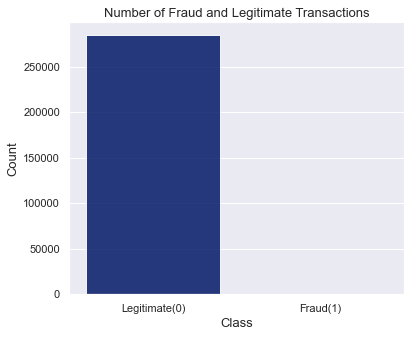

In [57]:
# plt.figure(figsize=())
case_count = pd.value_counts(df["Class"])
plt.figure(figsize=(6,5))

sns.barplot(['Legitimate(0)', 'Fraud(1)'], case_count.values, alpha=0.9)
plt.title('Number of Fraud and Legitimate Transactions',fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xlabel('Class', fontsize=13)


In [15]:
#We will use Robust Scaler as it is less prone to outliers
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()

df['Amount_Scaled'] = robust.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time_Scaled'] = robust.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class  Amount_Scaled  Time_Scaled  
0 -0.189115  0.133558 -0.021053      0       1.783274    -0.994983  
1  0.125895 -0.008983  0.014724      0      -0.269825    -0.994983  
2 -0.139097 -0.055353 -0.059752      0       4.983721    -0.994972  
3 -0.221929  0.062723  0.061458      0       1.418291    -0.994972  
4  0.502292  0.219422  0.215153      0       0.670579    -0.994960  

[5 rows x 31 columns]

In [16]:
df.rename(columns = {'Amount_Scaled':'Amount', 'Time_Scaled':'Time'}, inplace = True)
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class    Amount      Time  
0 -0.189115  0.133558 -0.021053      0  1.783274 -0.994983  
1  0.125895 -0.008983  0.014724      0 -0.269825 -0.994983  
2 -0.139097 -0.055353 -0.059752      0  4.983721 -0.994972  
3 -0.221929  0.062723  0.061458      0  1.418291 -0.994972  
4  0.502292  0.219422  0.215153      0  0.670579 -0.994960  

[5 rows x 31 columns]

In [17]:
temp = df[['Amount','Class']].copy()
c0 = temp.loc[temp['Class'] == 0]['Amount']
c1 = temp.loc[temp['Class'] == 1]['Amount']

In [18]:
c0.describe()

count    284315.000000
mean          0.926305
std           3.494796
min          -0.307413
25%          -0.228464
50%           0.000000
75%           0.769231
max         358.683155
Name: Amount, dtype: float64

In [19]:
c1.describe()

count    492.000000
mean       1.400284
std        3.586715
min       -0.307413
25%       -0.293440
50%       -0.178160
75%        1.172221
max       29.398030
Name: Amount, dtype: float64

<AxesSubplot:>

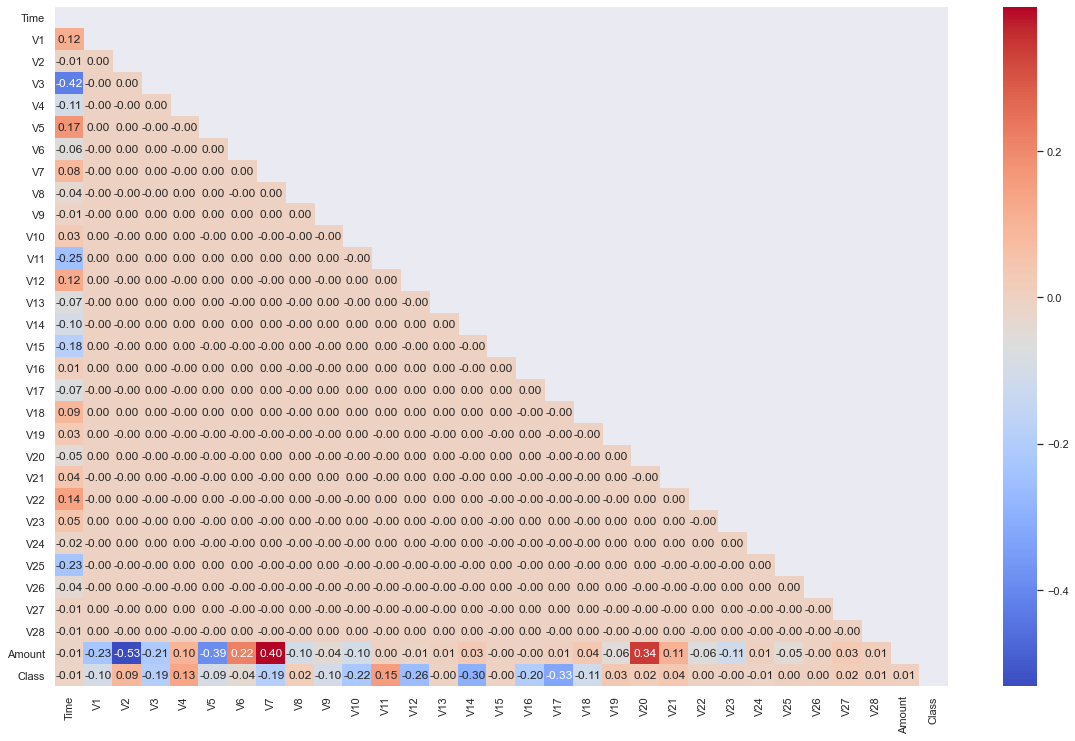

In [87]:
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(rc = {'figure.figsize':(20,12.5)})
sns.heatmap(corr, cmap='coolwarm', annot=True, annot_kws={'size':12}, fmt=".2f", mask = mask)


In [37]:
df = df.sample(frac=1)

df_fraud= df.loc[df['Class'] == 1]
df_legitimate = df.loc[df['Class'] == 0][:492]

df_balanced= pd.concat([df_fraud, df_legitimate]).sample(frac=1, random_state=10)
df_balanced.head()

V1        V2        V3        V4        V5        V6        V7  \
8617    0.919137  4.199633 -7.535607  7.426940  1.118215 -2.886722 -1.341036   
81609  -2.326922 -3.348439 -3.513408  3.175060 -2.815137 -0.203363 -0.892144   
41922  -0.207914  0.106231  1.480332 -0.547349 -0.282609 -0.780198  0.679507   
143335 -6.713407  3.921104 -9.746678  5.148263 -5.151563 -2.099389 -5.937767   
141259 -1.927453  1.827621 -7.019495  5.348303 -2.739188 -2.107219 -5.015848   

              V8        V9       V10  ...       V22       V23       V24  \
8617    0.363933 -2.203224 -4.137840  ...  0.055179  0.210692 -0.417918   
81609   0.333226 -0.802005 -4.350685  ... -0.695902 -1.478490 -0.061553   
41922  -0.464822 -1.874139  0.627754  ... -0.104081  0.120598  0.672687   
143335  3.578780 -4.684952 -8.537758  ... -0.451086  0.127214 -0.339450   
141259  1.205868 -4.382713 -8.337707  ... -0.792017 -0.771414 -0.379574   

             V25       V26       V27       V28  Class     Amount      Time  
8617   -0.911188  0.466524  0.627393  0.157851      1  -0.293440 -0.858293  
81609   0.236155  0.531911  0.302324  0.536375      1  19.109341 -0.301707  
41922  -0.600151  1.044314 -0.086872 -0.084102      0   0.425487 -0.514644  
143335  0.394096  1.075295  1.649906 -0.394905      1   3.226717  0.006967  
141259  0.718717  1.111151  1.277707  0.819081      1   6.850416 -0.005733  

[5 rows x 31 columns]

<AxesSubplot:>

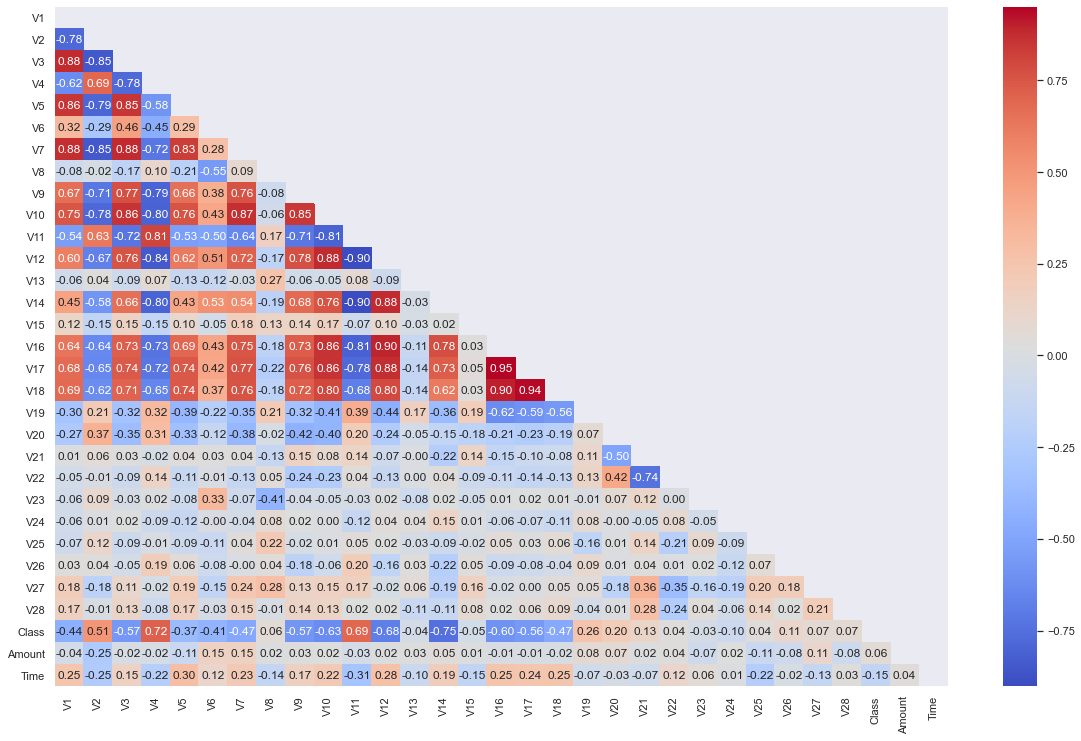

In [38]:
corr = df_balanced.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(rc = {'figure.figsize':(20,12.5)})
sns.heatmap(corr, cmap='coolwarm', annot=True, annot_kws={'size':12}, fmt=".2f", mask = mask)


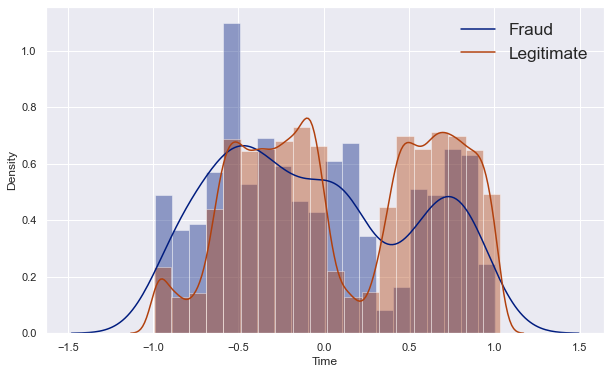

In [15]:
warnings.filterwarnings('ignore')
feature = 'Time'
plt.figure(figsize=(10,6))
sns.distplot(df[feature][df.Class == 1], bins=20)
sns.distplot(df[feature][df.Class == 0], bins=20)
plt.legend(labels=['Fraud','Legitimate'], loc='upper right', fontsize = "x-large")
plt.show()

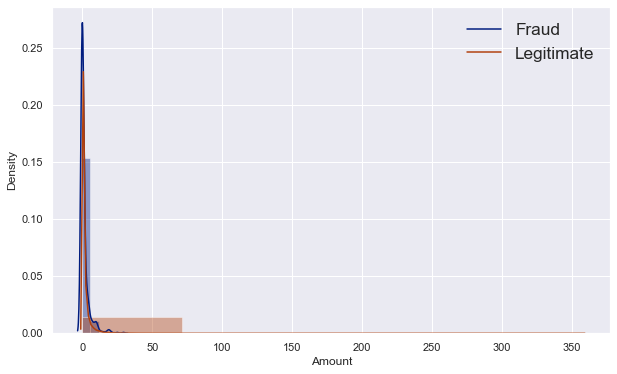

In [16]:
warnings.filterwarnings('ignore')
feature = 'Amount'
plt.figure(figsize=(10,6))
sns.distplot(df[feature][df.Class == 1], bins=5)
sns.distplot(df[feature][df.Class == 0], bins=5)
plt.legend(labels=['Fraud','Legitimate'], loc='upper right', fontsize = "x-large")
plt.show()

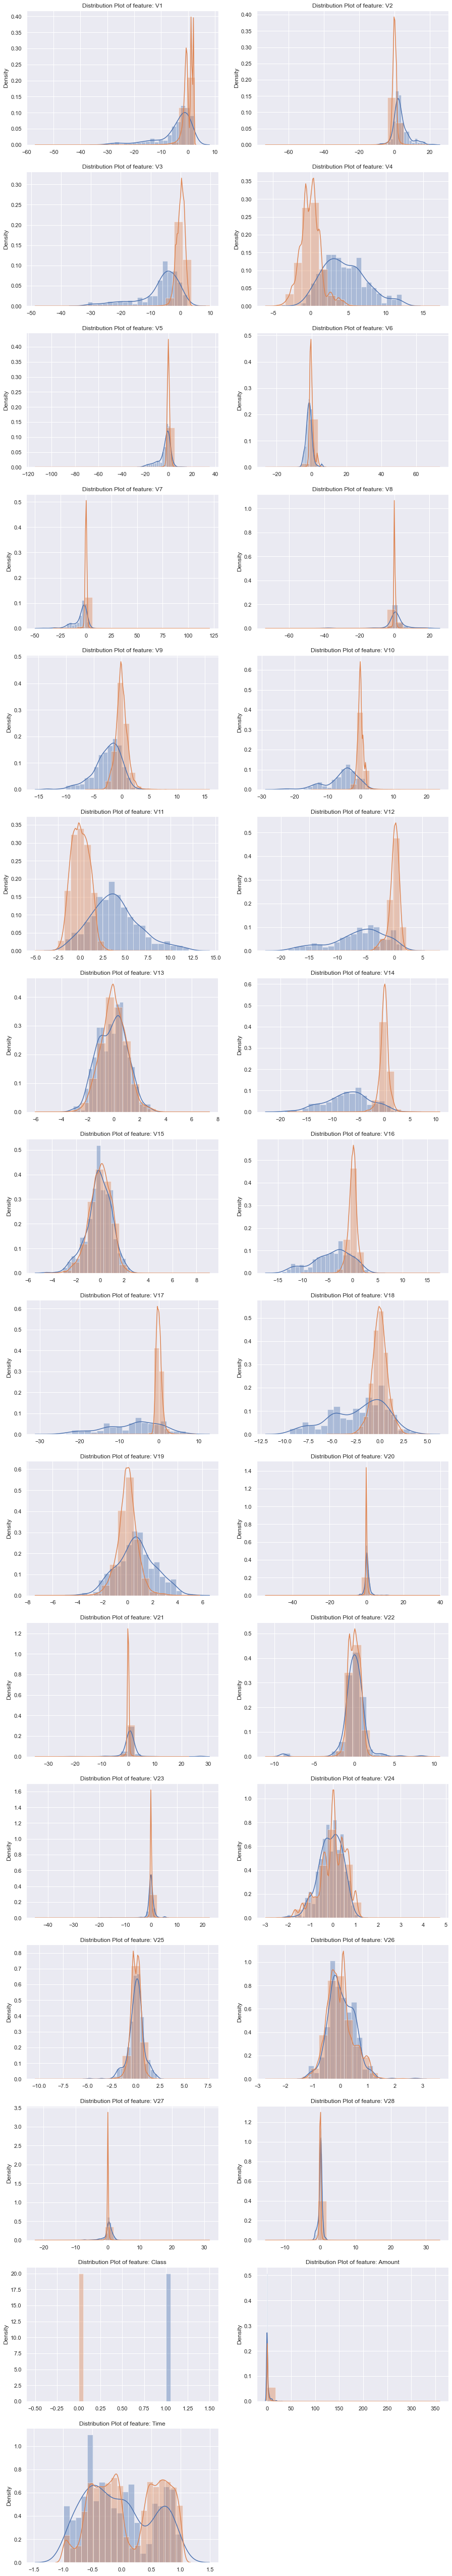

In [64]:
warnings.filterwarnings('ignore')

plt.figure(figsize=(15,31*3))
gs = gridspec.GridSpec(16, 2)
for i, feature in enumerate(df):
    ax = plt.subplot(gs[i])
    sns.distplot(df[feature][df.Class == 1], bins=20)
    sns.distplot(df[feature][df.Class == 0], bins=20)
    ax.set_xlabel('')
    ax.set_title('Distribution Plot of feature: ' + str(feature))
plt.show()


###### Since the extremely low correlation values of the attributes with respect to class and,  also considering the features that have very similar distributions between the two Classes in the above given distribution plots, we can drop attibutes: V8,V13,V15,V20,V22,V23,V24,V25,V26,V27 and V28
###### Also since the correlation between V17 and V18 is very high, we can drop V17

In [19]:
df = df.drop(['V8','V13','V15','V17','V20','V22','V23','V24','V25','V26','V27','V28'], axis =1)


In [20]:
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V9       V10       V11       V12       V14       V16       V18  \
0  0.363787  0.090794 -0.551600 -0.617801 -0.311169 -0.470401  0.025791   
1 -0.255425 -0.166974  1.612727  1.065235 -0.143772  0.463917 -0.183361   
2 -1.514654  0.207643  0.624501  0.066084 -0.165946 -2.890083 -0.121359   
3 -1.387024 -0.054952 -0.226487  0.178228 -0.287924 -1.059647  1.965775   
4  0.817739  0.753074 -0.822843  0.538196 -1.119670 -0.451449 -0.038195   

        V19       V21  Class    Amount      Time  
0  0.403993 -0.018307      0  1.783274 -0.994983  
1 -0.145783 -0.225775      0 -0.269825 -0.994983  
2 -2.261857  0.247998      0  4.983721 -0.994972  
3 -1.232622 -0.108300      0  1.418291 -0.994972  
4  0.803487 -0.009431      0  0.670579 -0.994960

In [21]:
X = df.drop('Class', axis=1)
y = df['Class']

print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))


Shape of X: (284807, 18)
Shape of y: (284807,)


# DO NOT RUN THIS AGAIN

# STARTS

In [85]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [86]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 408
Before OverSampling, counts of label '0': 227437 

After OverSampling, the shape of train_X: (454874, 18)
After OverSampling, the shape of train_y: (454874,) 

After OverSampling, counts of label '1': 227437
After OverSampling, counts of label '0': 227437


In [151]:
pd.DataFrame(X_train_res).to_csv("X_train_SMOTE.csv", index=None)
pd.DataFrame(y_train_res, columns={"Class"}).to_csv("Y_train_SMOTE.csv", index=None)

In [162]:
pd.DataFrame(X_test).to_csv("X_test.csv", index=None)
pd.DataFrame(y_test).to_csv("y_test.csv", index=None)

# ENDS

# <font color = blue>Recall created data split

In [58]:
X_train = pd.read_csv('X_train_SMOTE.csv')
y_train = pd.read_csv('Y_train_SMOTE.csv').to_numpy()


In [59]:
X_train.head()

V1        V2        V3        V4        V5        V6        V7  \
0  1.243914 -0.307145  0.121309 -1.467727 -0.827593 -1.360302 -0.046334   
1  1.927289 -2.063110  0.309806 -1.315091 -2.549290 -0.643856 -1.785911   
2 -0.735241  0.521395  0.083968 -3.509213  0.892106 -1.710182  1.672417   
3 -0.921449 -0.348660  1.705199 -1.149593  0.709766  0.770728  0.223739   
4  1.006644 -0.040923  0.488122  1.454106 -0.404161  0.357960 -0.462979   

         V9       V10       V11       V12       V14       V16       V18  \
0  0.999563 -0.855092  1.710438  1.017490  0.741902 -0.362753  0.170231   
1 -0.690607  1.492865 -0.490014 -0.708811 -0.766309  0.218568  0.571353   
2  0.455882 -2.163191  0.927927  0.767882  0.956023 -1.481959  0.197162   
3  0.858968 -0.894128 -1.709759  0.593591 -1.303243  0.114136 -0.777197   
4  0.679217 -0.549390  1.146268  0.706928 -1.084117 -0.100228  0.346190   

        V19       V21    Amount      Time  
0  1.041568 -0.118543 -0.027947 -0.297384  
1 -1.020477  0.214749  1.825613  0.368590  
2  0.899089  0.225166 -0.097813  0.601899  
3 -0.064471 -0.287249  0.889541 -0.475440  
4 -0.220392 -0.012620  0.294138 -0.193036

In [60]:
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')


In [61]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(454874, 18)
(454874, 1)
(56962, 18)
(56962, 1)


# <font color=blue>Confusion Matrix


In [88]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

def plot_confusion_matrix(cm, model):
    plt.figure(figsize=(8,6))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, annot_kws={'size':15}, fmt='g', ax = ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'Confusion Matrix - {model}')
    ax.xaxis.set_ticklabels(['Not Fraud','Fraud'])
    ax.yaxis.set_ticklabels(['Not Fraud','Fraud'])
    plt.show()

# <font color=blue> Function for Metrics Eval

In [63]:
def calc_metrics(cm):
    tn, fp, fn, tp = cm.ravel()
    m = dict()
    m['recall'] = 100*tp/(tp+fn)
    m['precision'] = 100*tp/(tp+fp)
    m['accuracy'] = 100*(tn+tp)/(tn+tp+fn+fp)
    m['f1'] = 2/((1/m['precision'])+(1/m['recall']))
    m['mcc'] = ((tp*tn)-(fp*fn))/np.sqrt((tp+fp)*(tn+fn)*(tn+fp)*(tp+fn))
    
    return m

# <font color=blue> Precision Recall Curve

In [62]:
from sklearn.metrics import precision_recall_curve

def plot_prcurve(precision, recall, model):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.set_title(f'Precision Recall Curve - {model}')    
    ax.plot(recall, precision, label="")

    baseline = y_test[y_test==1].count()/y_test.count()    
    ax.plot([0,1], [baseline, baseline], linestyle='--', label='Baseline')
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.legend(loc='center left');


# <font color = red> Model - Logistic regression</font>

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

In [90]:
lr = LogisticRegression(C=1,penalty='l1', solver="liblinear", verbose=5)
startlr = timeit.default_timer()
lr.fit(X_train, y_train.ravel())
endlr = timeit.default_timer()


[LibLinear]

# Logistic Regression Confusion Matrix

Recall in the Training dataset: 89.5254510040143%
Precision in the Training dataset: 97.08201817540314%


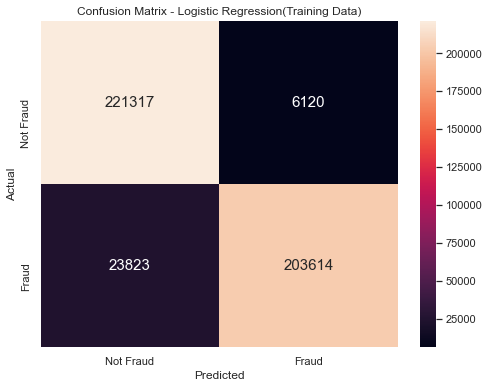

In [91]:
# Prediction on Training Dataset

y_train_pre = lr.predict(X_train)

cm_lr = confusion_matrix(y_train, y_train_pre)
tn, fp, fn, tp = cm_lr.ravel()

print(f"Recall in the Training dataset: {tp/(tp+fn)*100}%")
print(f"Precision in the Training dataset: {tp/(tp+fp)*100}%")


plot_confusion_matrix(cm_lr, "Logistic Regression(Training Data)")

## Prediction on Testing Data

Recall in the Testing dataset: 96.42857142857143%
Precision in the Testing dataset: 5.287206266318538%


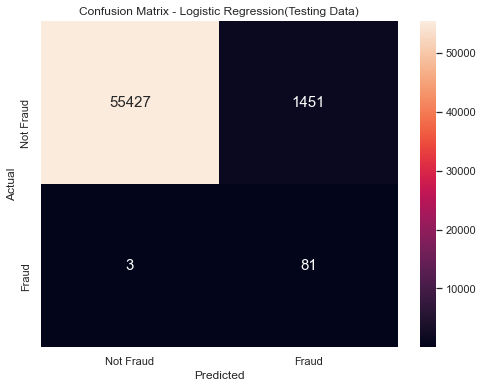

In [92]:
y_pre = lr.predict(X_test)

cm_lr_ = confusion_matrix(y_test, y_pre)
tn, fp, fn, tp = cm_lr_.ravel()

print(f"Recall in the Testing dataset: {tp/(tp+fn)*100}%")
print(f"Precision in the Testing dataset: {tp/(tp+fp)*100}%")


plot_confusion_matrix(cm_lr_, "Logistic Regression(Testing Data)")

In [35]:
metrics_lr = calc_metrics(cm_lr_)

In [42]:
print("Training Time: ", endlr - startlr)
for k,v in metrics_lr.items():
    print(k,v)

Training Time:  2.0081100999999535
recall 96.42857142857143
precision 5.287206266318538
accuracy 97.44742108774271
f1 10.024752475247526
mcc 0.2226750108787793
pr_auc 0.6421753024777924


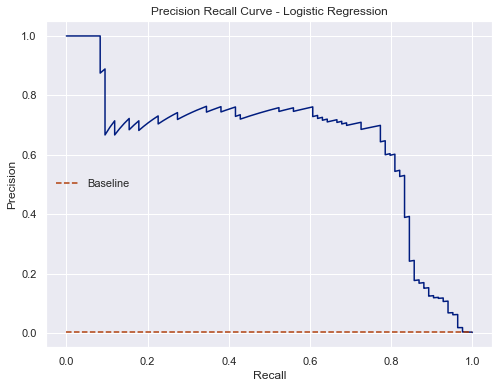

In [37]:
prec, rec, thresh = precision_recall_curve(y_test, lr.predict_proba(X_test)[:, 1])

plot_prcurve(prec, rec, "Logistic Regression")

In [43]:
pr_auc_lr = auc(rec, prec)
metrics_lr['pr_auc'] = pr_auc_lr
metrics_lr['time'] = endlr - startlr
pr_auc_lr

0.6421753024777924

# <font color = red> Model - KNN</font>


In [95]:

knn = KNeighborsClassifier(n_neighbors = 10)

startknn = timeit.default_timer()
knn.fit(X_train, y_train.ravel())

y_pred_knn = knn.predict(X_test)

endknn = timeit.default_timer()



In [96]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

metrics_knn = calc_metrics(cm_knn)

In [97]:
print("Training Time: ", endknn - startknn)
for k,v in metrics_knn.items():
    print(k,v)

Training Time:  22.64073930000086
recall 90.47619047619048
precision 30.278884462151396
accuracy 99.67873319054809
f1 45.37313432835821
mcc 0.5223916210504138


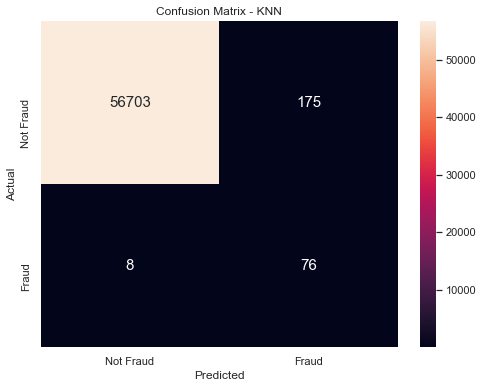

In [98]:
name = "KNN"
plot_confusion_matrix(cm_knn, name)


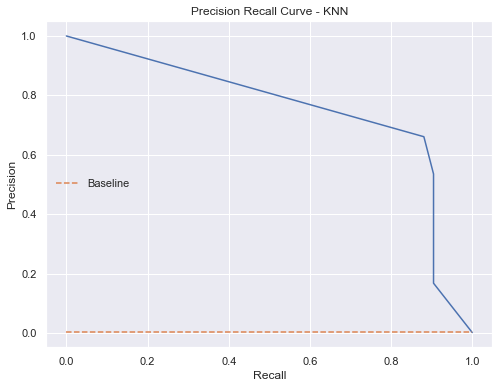

In [99]:
prec_knn, rec_knn, th_knn = precision_recall_curve(y_test, knn.predict_proba(X_test)[:,1])
plot_prcurve(prec_knn, rec_knn, "KNN")

In [100]:
pr_auc_knn = auc(rec_knn, prec_knn)
metrics_knn['pr_auc'] = pr_auc_knn
metrics_knn['time'] = endknn - startknn
pr_auc_knn

0.7537840037888792

# <font color=red> Model Random Forest</font>

In [58]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 123)

In [60]:
startrfc = timeit.default_timer()
rfc.fit(X_train, y_train.ravel())
endrfc = timeit.default_timer()

In [61]:
y_pred_rfc = rfc.predict(X_test)

In [62]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

metrics_rfc = calc_metrics(cm_rfc)

In [63]:
print("Training Time: ", endrfc - startrfc)
for k,v in metrics_rfc.items():
    print(k,v)

Training Time:  269.1741651
recall 84.52380952380952
precision 86.58536585365853
accuracy 99.95786664794073
f1 85.54216867469879
mcc 0.8552730020452962


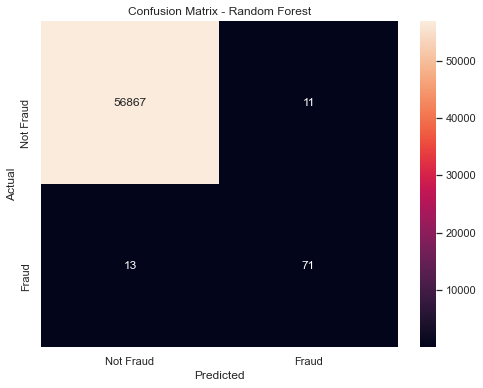

In [64]:
name = "Random Forest"
plot_confusion_matrix(cm_rfc, name)


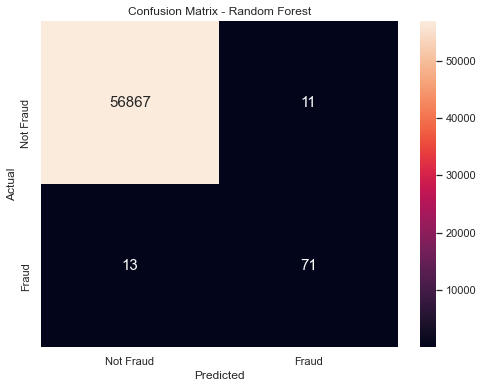

In [103]:
name = "Random Forest"
plot_confusion_matrix([[56867,11],[13,71]], name)


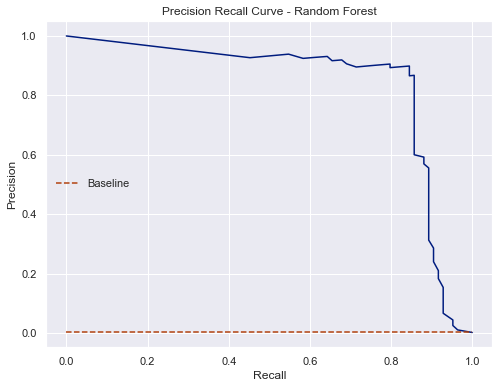

In [67]:
prec_rfc, rec_rfc, _ = precision_recall_curve(y_test, rfc.predict_proba(X_test)[:,1])
plot_prcurve(prec_rfc, rec_rfc, "Random Forest")

In [68]:
pr_auc_rfc = auc(rec_rfc, prec_rfc)
metrics_rfc['pr_auc'] = pr_auc_rfc
metrics_rfc['time'] = endrfc - startrfc
pr_auc_rfc

0.8372274101221302

# <font color=red> Model - Decision Tree </font>

In [77]:
dt = DecisionTreeClassifier(random_state = 123)

In [78]:
startdt = timeit.default_timer()
dt.fit(X_train, y_train.ravel())
enddt = timeit.default_timer()

In [79]:
y_pred_dt = dt.predict(X_test)

In [80]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

metrics_dt = calc_metrics(cm_dt)

In [81]:
print("Training Time: ", enddt - startdt)
for k,v in metrics_dt.items():
    print(k,v)

Training Time:  21.01413189999994
recall 84.52380952380952
precision 32.56880733944954
accuracy 99.71911098627155
f1 47.019867549668874
mcc 0.5236880575273621


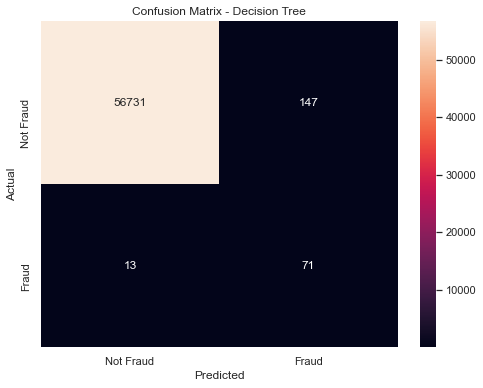

In [82]:
name = "Decision Tree"
plot_confusion_matrix(cm_dt, name)


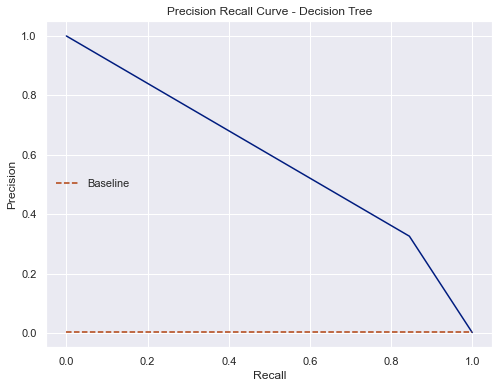

In [83]:
prec_dt, rec_dt, th = precision_recall_curve(y_test, dt.predict_proba(X_test)[:,1])
plot_prcurve(prec_dt, rec_dt, "Decision Tree")

In [84]:
pr_auc_dt = auc(rec_dt, prec_dt)
metrics_dt['pr_auc'] = pr_auc_dt
metrics_dt['time'] = enddt - startdt
pr_auc_dt

0.5855771954781225

# <font color=red> Model - GaussianNB

In [85]:
nb = GaussianNB()

In [86]:
startnb = timeit.default_timer()
nb.fit(X_train, y_train.ravel())
endnb = timeit.default_timer()

In [87]:
y_pred_nb = nb.predict(X_test)

In [88]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

metrics_nb = calc_metrics(cm_nb)

In [89]:
print("Training Time: ", endnb - startnb)
for k,v in metrics_nb.items():
    print(k,v)

Training Time:  0.23972200000002886
recall 85.71428571428571
precision 5.990016638935108
accuracy 97.99515466451318
f1 11.19751166407465
mcc 0.2235459005563515


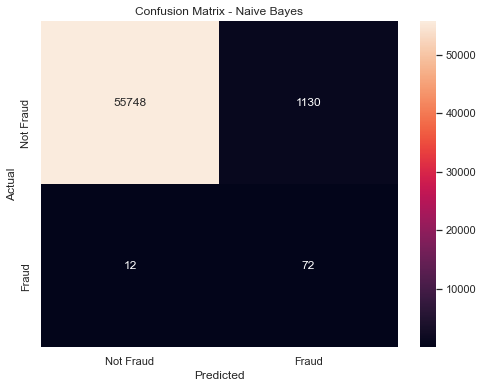

In [90]:
name = "Naive Bayes"
plot_confusion_matrix(cm_nb, name)


In [92]:
prec_nb, rec_nb, _ = precision_recall_curve(y_test, nb.predict_proba(X_test)[:,1])

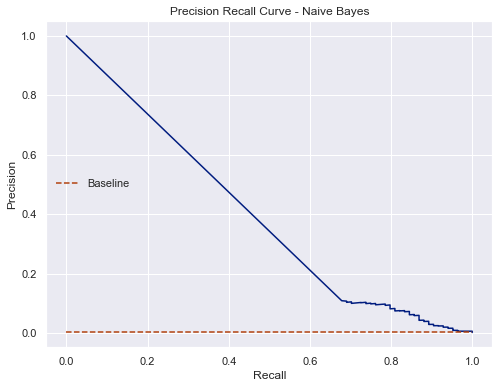

In [93]:
plot_prcurve(prec_nb, rec_nb, name)

In [94]:
pr_auc_nb = auc(rec_nb, prec_nb)
metrics_nb['pr_auc'] = pr_auc_nb
metrics_nb['time'] = endnb - startnb
pr_auc_nb

0.3955895416736199


# <font color = red> Model - Ada Boost

In [118]:
ada = AdaBoostClassifier(n_estimators=25, random_state = 123)

In [119]:
startada = timeit.default_timer()
ada.fit(X_train, y_train.ravel())
endada = timeit.default_timer()

In [120]:
y_pred_ada = ada.predict(X_test)

In [121]:
cm_ada = confusion_matrix(y_test, y_pred_ada)

metrics_ada = calc_metrics(cm_ada)

In [122]:
print("Training Time: ", endada - startada)
for k,v in metrics_ada.items():
    print(k,v)

Training Time:  40.222219100000075
recall 91.66666666666667
precision 4.770755885997522
accuracy 97.28942101752045
f1 9.069493521790342
mcc 0.20574310196477105


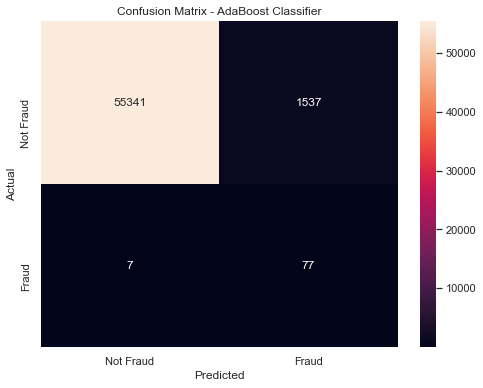

In [123]:
name = "AdaBoost Classifier"
plot_confusion_matrix(cm_ada, name)


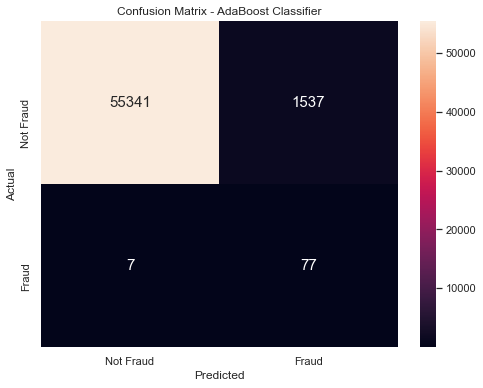

In [104]:
name = "AdaBoost Classifier"
plot_confusion_matrix([[55341,1537],[7,77]], name)


In [124]:
prec_ada, rec_ada, _ = precision_recall_curve(y_test, ada.predict_proba(X_test)[:,1])

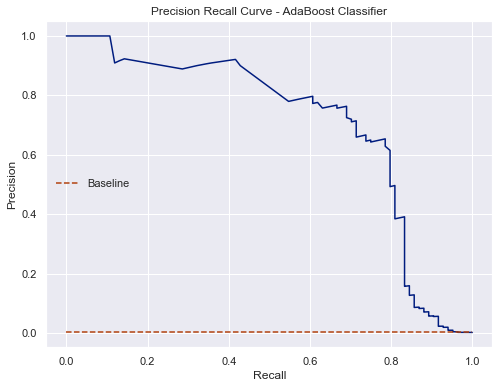

In [125]:
plot_prcurve(prec_ada, rec_ada, name)

In [126]:
pr_auc_ada = auc(rec_ada, prec_ada)
metrics_ada['pr_auc'] = pr_auc_ada
metrics_ada['time'] = endada - startada
pr_auc_ada

0.7044330911437651

# <font color=red> Model - Gradient Boosting

In [127]:
gb = GradientBoostingClassifier(n_estimators = 100, random_state = 123)

In [128]:
startgb = timeit.default_timer()
gb.fit(X_train, y_train.ravel())
endgb = timeit.default_timer()

In [129]:
y_pred_gb = gb.predict(X_test)

In [130]:
cm_gb = confusion_matrix(y_test, y_pred_gb)

metrics_gb = calc_metrics(cm_gb)

In [131]:
print("Training Time: ", endgb - startgb)
for k,v in metrics_gb.items():
    print(k,v)

Training Time:  367.52505999999994
recall 92.85714285714286
precision 9.68944099378882
accuracy 98.71317720585654
f1 17.547806524184477
mcc 0.2977197594527845


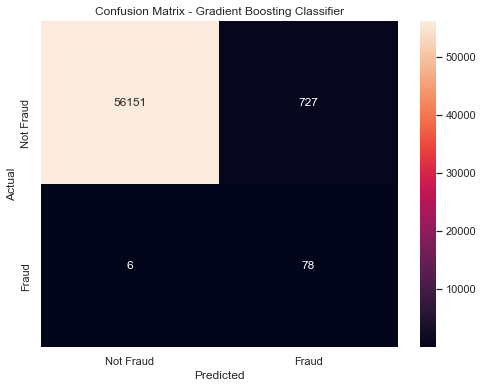

In [132]:
name = "Gradient Boosting Classifier"
plot_confusion_matrix(cm_gb, name)


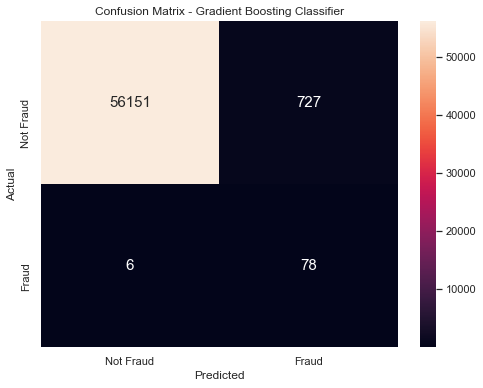

In [105]:
name = "Gradient Boosting Classifier"
plot_confusion_matrix([[56151,727],[6,78]], name)


In [134]:
prec_gb, rec_gb, _ = precision_recall_curve(y_test, gb.predict_proba(X_test)[:,1])

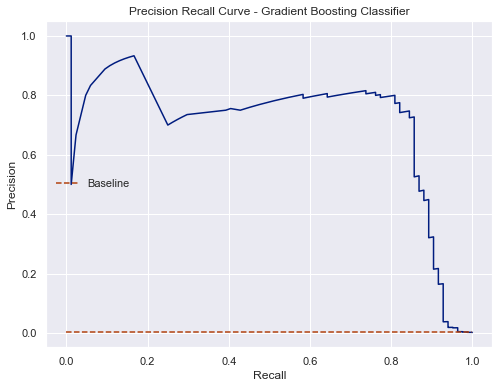

In [135]:
plot_prcurve(prec_gb, rec_gb, name)

In [136]:
pr_auc_gb = auc(rec_gb, prec_gb)
metrics_gb['pr_auc'] = pr_auc_gb
metrics_gb['time'] = endgb - startgb
pr_auc_gb

0.7061885132038148

# <font color=red> Model - XG Boost

In [65]:
xgb = xgboost.XGBClassifier(objective="binary:logistic", random_state=42)

In [66]:
startxgb = timeit.default_timer()
xgb.fit(X_train, y_train.ravel())
endxgb = timeit.default_timer()

In [67]:
y_pred_xgb = xgb.predict(X_test)

In [68]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

metrics_xgb = calc_metrics(cm_xgb)

In [69]:
print("Training Time: ", endxgb - startxgb)
for k,v in metrics_xgb.items():
    print(k,v)

Training Time:  52.998224800000116
recall 85.71428571428571
precision 67.9245283018868
accuracy 99.91924440855307
f1 75.78947368421052
mcc 0.7626423983020595


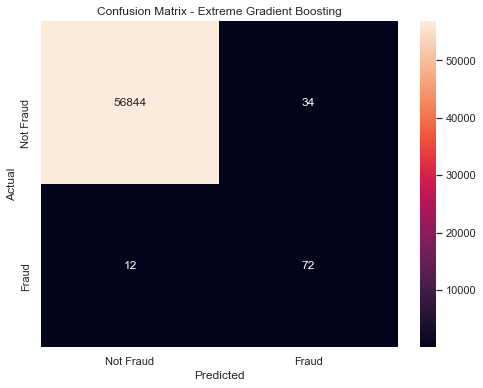

In [70]:
name = "Extreme Gradient Boosting"
plot_confusion_matrix(cm_xgb, name)


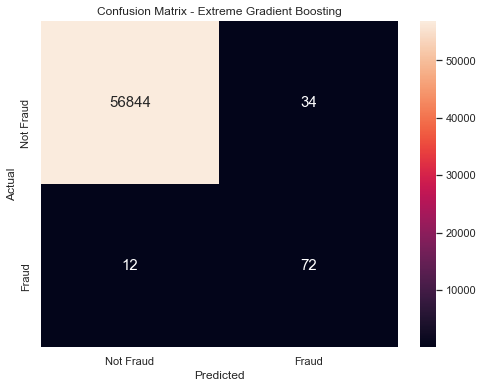

In [106]:
name = "Extreme Gradient Boosting"
plot_confusion_matrix([[56844,34],[12,72]], name)


In [71]:
prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, xgb.predict_proba(X_test)[:,1])

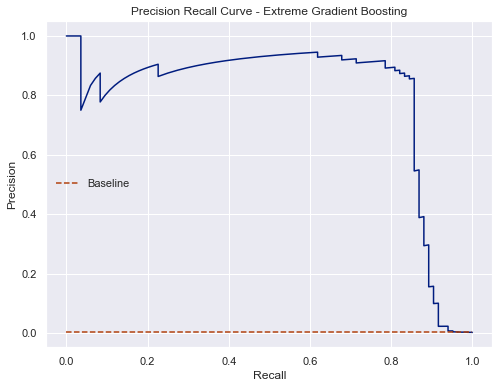

In [72]:
plot_prcurve(prec_xgb, rec_xgb, name)

In [73]:
pr_auc_xgb = auc(rec_xgb, prec_xgb)
metrics_xgb['pr_auc'] = pr_auc_xgb
metrics_xgb['time'] = endxgb - startxgb
pr_auc_xgb

0.7924283323873406

# <font color=red> LGBM

In [146]:
lgbm = LGBMClassifier()

In [147]:
startlgbm = timeit.default_timer()
lgbm.fit(X_train, y_train.ravel())
endlgbm = timeit.default_timer()

In [148]:
y_pred_lgbm = lgbm.predict(X_test)

In [149]:
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)

metrics_lgbm = calc_metrics(cm_lgbm)

In [150]:
print("Training Time: ", endlgbm - startlgbm)
for k,v in metrics_lgbm.items():
    print(k,v)

Training Time:  2.4640332999997554
recall 82.14285714285714
precision 38.12154696132597
accuracy 99.77704434535305
f1 52.07547169811321
mcc 0.5587254585362811


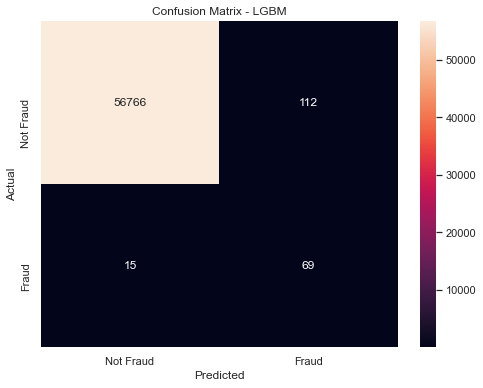

In [151]:
name = "LGBM"
plot_confusion_matrix(cm_lgbm, name)


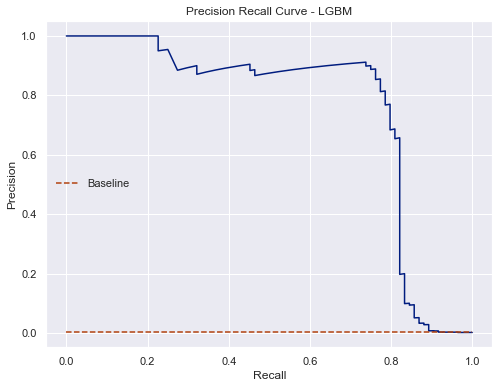

In [152]:
prec_lgbm, rec_lgbm, _ = precision_recall_curve(y_test, lgbm.predict_proba(X_test)[:,1])
plot_prcurve(prec_lgbm, rec_lgbm, name)

In [153]:
pr_auc_lgbm = auc(rec_lgbm, prec_lgbm)
metrics_lgbm['pr_auc'] = pr_auc_lgbm
metrics_lgbm['time'] = endlgbm - startlgbm
pr_auc_lgbm

0.7571856488219574

# <font color=red> Model - SGD (One class SVM)

In [74]:
from sklearn.linear_model import SGDOneClassSVM

In [75]:
svc = SGDOneClassSVM(max_iter = 100)

In [76]:
startsvc= timeit.default_timer()
svc.fit(X_train)
endsvc = timeit.default_timer()

In [77]:
y_pred_svc = svc.predict(X_test)

In [78]:
cm_svc = confusion_matrix(y_test, y_pred_svc)

act_cm_svc = [x for i in cm_svc for x in i if x!=0]
cmsvc = np.array(act_cm_svc)
metrics_svc = calc_metrics(cmsvc)

In [79]:
print("Training Time: ", endsvc - startsvc)
for k,v in metrics_svc.items():
    print(k,v)

Training Time:  2.1831188999994993
recall 89.28571428571429
precision 1.3982102908277405
accuracy 90.69906253291668
f1 2.7533039647577096
mcc 0.10509199909480893


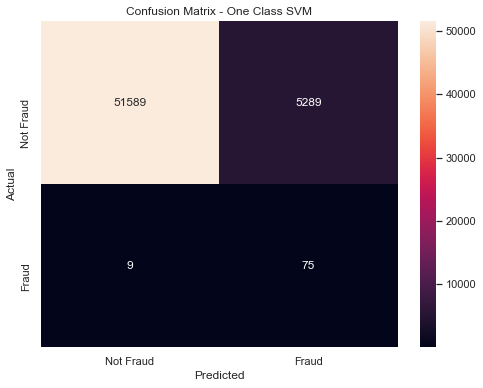

In [80]:
name = "One Class SVM"
plot_confusion_matrix(cmsvc.reshape(2,2), name)


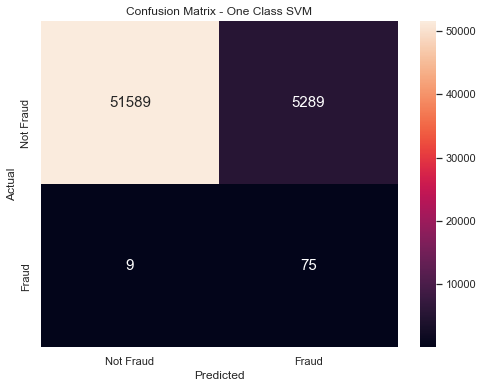

In [122]:
name = "One Class SVM"
plot_confusion_matrix([[51589,5289],[9,75]], name)


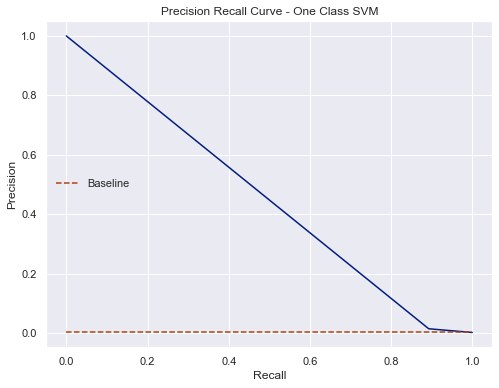

In [82]:
prec_svc, rec_svc, _ = precision_recall_curve(y_test, y_pred_svc)
plot_prcurve(prec_svc, rec_svc, name)

In [85]:
pr_auc_svc = auc(rec_svc, prec_svc)
metrics_svc['pr_auc'] = pr_auc_svc
metrics_svc['time'] = endsvc - startsvc
pr_auc_svc

0.4534986229178213

# <font color=red> Model - MLP Classifier

In [165]:
from sklearn.neural_network import MLPClassifier

In [166]:
mlp = MLPClassifier(random_state=1, max_iter=100, verbose = True)

In [167]:
startmlp= timeit.default_timer()
mlp.fit(X_train, y_train.ravel())
endmlp = timeit.default_timer()

Iteration 1, loss = 0.08126282
Iteration 2, loss = 0.02614809
Iteration 3, loss = 0.01543408
Iteration 4, loss = 0.01118077
Iteration 5, loss = 0.00847820
Iteration 6, loss = 0.00713320
Iteration 7, loss = 0.00626359
Iteration 8, loss = 0.00566109
Iteration 9, loss = 0.00509916
Iteration 10, loss = 0.00473396
Iteration 11, loss = 0.00441415
Iteration 12, loss = 0.00387276
Iteration 13, loss = 0.00375792
Iteration 14, loss = 0.00341853
Iteration 15, loss = 0.00328732
Iteration 16, loss = 0.00321891
Iteration 17, loss = 0.00325343
Iteration 18, loss = 0.00274704
Iteration 19, loss = 0.00285490
Iteration 20, loss = 0.00261432
Iteration 21, loss = 0.00243756
Iteration 22, loss = 0.00228750
Iteration 23, loss = 0.00234970
Iteration 24, loss = 0.00236200
Iteration 25, loss = 0.00204015
Iteration 26, loss = 0.00205230
Iteration 27, loss = 0.00204026
Iteration 28, loss = 0.00205602
Iteration 29, loss = 0.00186530
Iteration 30, loss = 0.00215378
Iteration 31, loss = 0.00179794
Iteration 32, los

In [168]:
y_pred_mlp = mlp.predict(X_test)

In [169]:
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

metrics_mlp = calc_metrics(cm_mlp)

In [170]:
print("Training Time: ", endmlp - startmlp)
for k,v in metrics_mlp.items():
    print(k,v)

Training Time:  106.46833749999996
recall 86.9047619047619
precision 59.34959349593496
accuracy 99.89291106351602
f1 70.53140096618357
mcc 0.7176952599629127


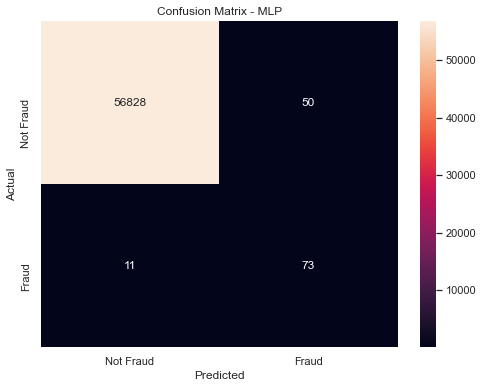

In [171]:
name = "MLP"
plot_confusion_matrix(cm_mlp, name)


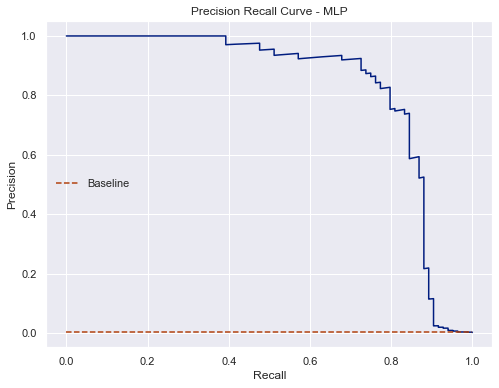

In [172]:
prec_mlp, rec_mlp, _ = precision_recall_curve(y_test, mlp.predict_proba(X_test)[:,1])
plot_prcurve(prec_mlp, rec_mlp, name)

In [173]:
pr_auc_mlp = auc(rec_mlp, prec_mlp)
metrics_mlp['pr_auc'] = pr_auc_mlp
metrics_mlp['time'] = endmlp - startmlp
pr_auc_mlp

0.8290539178024032

# <font color = red> Model - ANN


In [108]:
ann = tf.keras.models.Sequential()

In [109]:
X_train.shape

(454874, 18)

In [110]:
total = y[0] + y[1]
total

284807

In [111]:
metrics = [
    tf.keras.metrics.FalseNegatives(name="fn"),
    tf.keras.metrics.FalsePositives(name="fp"),
    tf.keras.metrics.TrueNegatives(name="tn"),
    tf.keras.metrics.TruePositives(name="tp"),
    tf.keras.metrics.Precision(name="precision"),
    tf.keras.metrics.Recall(name="recall"),
    tf.keras.metrics.Accuracy(name="Accuracy"),
]

w0 = total/(2 * y[0])
w1 = total/(2 * y[1])
class_weights = {0: w0, 1:w1}
class_weights

{0: 0.5008652375006595, 1: 289.4380081300813}

In [112]:
callback = tf.keras.callbacks.EarlyStopping(monitor = "recall", patience=10, mode="max")

In [113]:
ann.add(tf.keras.layers.Dense(512, input_shape=(18, ), activation='relu'))
ann.add(tf.keras.layers.Dense(512, activation="relu"))
ann.add(tf.keras.layers.Dropout(0.5))
ann.add(tf.keras.layers.Dense(512, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.5))
ann.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [114]:
ann.compile(Adam(lr=0.01), loss = "binary_crossentropy", metrics=metrics)

In [115]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               9728      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 535,553
Trainable params: 535,553
Non-trainable params: 0
__________________________________________________

In [116]:
startann = timeit.default_timer()
ann.fit(X_train, y_train, epochs=15, batch_size=2048, class_weight = class_weights)
endann = timeit.default_timer()

Epoch 1/15
223/223 [==============================] - 14s 62ms/step - loss: 1.8059 - fn: 387.0000 - fp: 68938.0000 - tn: 158499.0000 - tp: 227050.0000 - precision: 0.7671 - recall: 0.9983 - Accuracy: 0.4541
Epoch 2/15
223/223 [==============================] - 13s 60ms/step - loss: 0.2512 - fn: 11.0000 - fp: 23313.0000 - tn: 204124.0000 - tp: 227426.0000 - precision: 0.9070 - recall: 1.0000 - Accuracy: 0.4649
Epoch 3/15
223/223 [==============================] - 14s 61ms/step - loss: 0.2161 - fn: 4.0000 - fp: 15636.0000 - tn: 211801.0000 - tp: 227433.0000 - precision: 0.9357 - recall: 1.0000 - Accuracy: 0.4936s - loss: 0.3180 -
Epoch 4/15
223/223 [==============================] - 12s 53ms/step - loss: 0.1356 - fn: 6.0000 - fp: 16547.0000 - tn: 210890.0000 - tp: 227431.0000 - precision: 0.9322 - recall: 1.0000 - Accuracy: 0.5303
Epoch 5/15
223/223 [==============================] - 12s 54ms/step - loss: 0.1025 - fn: 3.0000 - fp: 12128.0000 - tn: 215309.0000 - tp: 227434.0000 - precisio

In [117]:
y_pred_ann = ann.predict(X_test)

y_pred_ann

array([[0.       ],
       [0.       ],
       [0.       ],
       ...,
       [0.7930734],
       [0.       ],
       [0.9723824]], dtype=float32)

In [118]:
yfinal_pred = y_pred_ann.ravel().astype('int64')
# yfinal_pred = np.delete(y_pred_ann, 1, 1).ravel().astype('int64')

In [119]:
yfinal_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [120]:
cm_ann = confusion_matrix(y_test, yfinal_pred)

metrics_ann = calc_metrics(cm_ann)

print("Training Time: ", endann - startann)
for k,v in metrics_ann.items():
    print(k,v)

Training Time:  202.67698500000188
recall 85.71428571428571
precision 23.376623376623378
accuracy 99.5646220287209
f1 36.734693877551024
mcc 0.44634116202602425


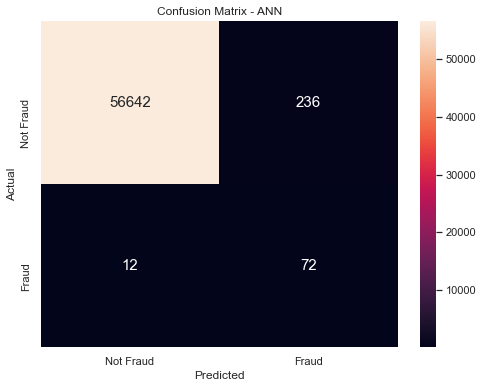

In [121]:
name = "ANN"
plot_confusion_matrix(cm_ann, name)


In [256]:
metrics_ann['time'] = endann - startann

# Final Score

In [257]:
pd.DataFrame([metrics_lr, metrics_knn, metrics_dt, metrics_rfc, metrics_nb, metrics_ada, metrics_gb, metrics_xgb, metrics_lgbm, 
              metrics_svc, metrics_ann] ,index = ['LR','KNN','DT','RF','NB','AdaBoost','Gradient Boost','XG Boost', 'LGBM',
                                                  'One Class SVM', 'ANN'])

recall  precision   accuracy         f1       mcc  \
LR              96.428571   5.287206  97.447421  10.024752  0.222675   
KNN             90.476190  14.587332  99.204733  25.123967  0.361541   
DT              84.523810  32.568807  99.719111  47.019868  0.523688   
RF              84.523810  86.585366  99.957867  85.542169  0.855273   
NB              85.714286   5.990017  97.995155  11.197512  0.223546   
AdaBoost        91.666667   4.770756  97.289421   9.069494  0.205743   
Gradient Boost  92.857143   9.689441  98.713177  17.547807  0.297720   
XG Boost        85.714286  67.924528  99.919244  75.789474  0.762642   
LGBM            82.142857  38.121547  99.777044  52.075472  0.558725   
One Class SVM   88.095238   1.339124  90.411151   2.638146  0.101788   
ANN             88.095238  33.484163  99.724378  48.524590  0.542180   

                  pr_auc        time  
LR              0.642175    2.008110  
KNN             0.753784   19.254867  
DT              0.585577   21.014132  
RF              0.837227  269.174165  
NB              0.395590    0.239722  
AdaBoost        0.704433   40.222219  
Gradient Boost  0.706189  367.525060  
XG Boost             NaN         NaN  
LGBM            0.757186    2.464033  
One Class SVM        NaN    0.708736  
ANN                  NaN  187.709672